# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Sumber: https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

### Keterangan dataset
- dataset ini tidak mempunyai label.

- Jumlah baris dari data ini terlalu banyak yaitu sekitar satu juta baris. Sehingga saya menggunakan data sample sebanyak 10000 untuk pengerjaan tugas ini

- Dataset ini terdiri dari kolom numerik dan kolom kategorikal

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [62]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('synthetic_beverage_sales_data.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [65]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


In [66]:
print(df.nunique())
df.head()

Order_ID         3000000
Customer_ID        10000
Customer_Type          2
Product               47
Category               4
Unit_Price         12778
Quantity             100
Discount               4
Total_Price       203842
Region                16
Order_Date          1094
dtype: int64


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [67]:
#copy df supaya df asli tidak berubah (preventif jika terjadi kesalahan)
df_copy = df.copy()

In [68]:
df_copy.nunique()

,0
Order_ID,3000000
Customer_ID,10000
Customer_Type,2
Product,47
Category,4
Unit_Price,12778
Quantity,100
Discount,4
Total_Price,203842
Region,16


In [69]:
# 1. Memahami Struktur Data
print("Jumlah baris dan kolom:", df_copy.shape)
print("\nJenis data di setiap kolom:\n", df_copy.dtypes)

Jumlah baris dan kolom: (8999910, 11)

Jenis data di setiap kolom:
 Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object


In [70]:
# 2. Menangani Data yang Hilang
print("Jumlah data yang hilang di setiap kolom:\n", df_copy.isnull().sum())

Jumlah data yang hilang di setiap kolom:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


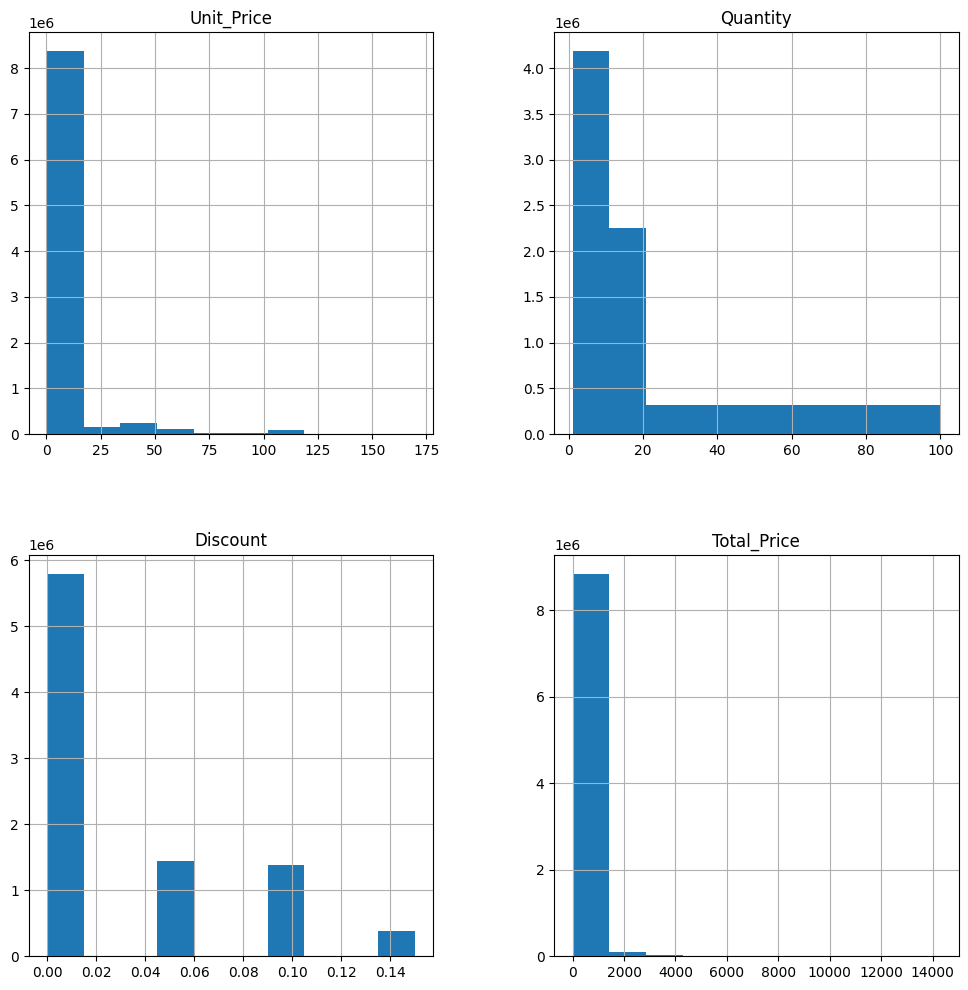

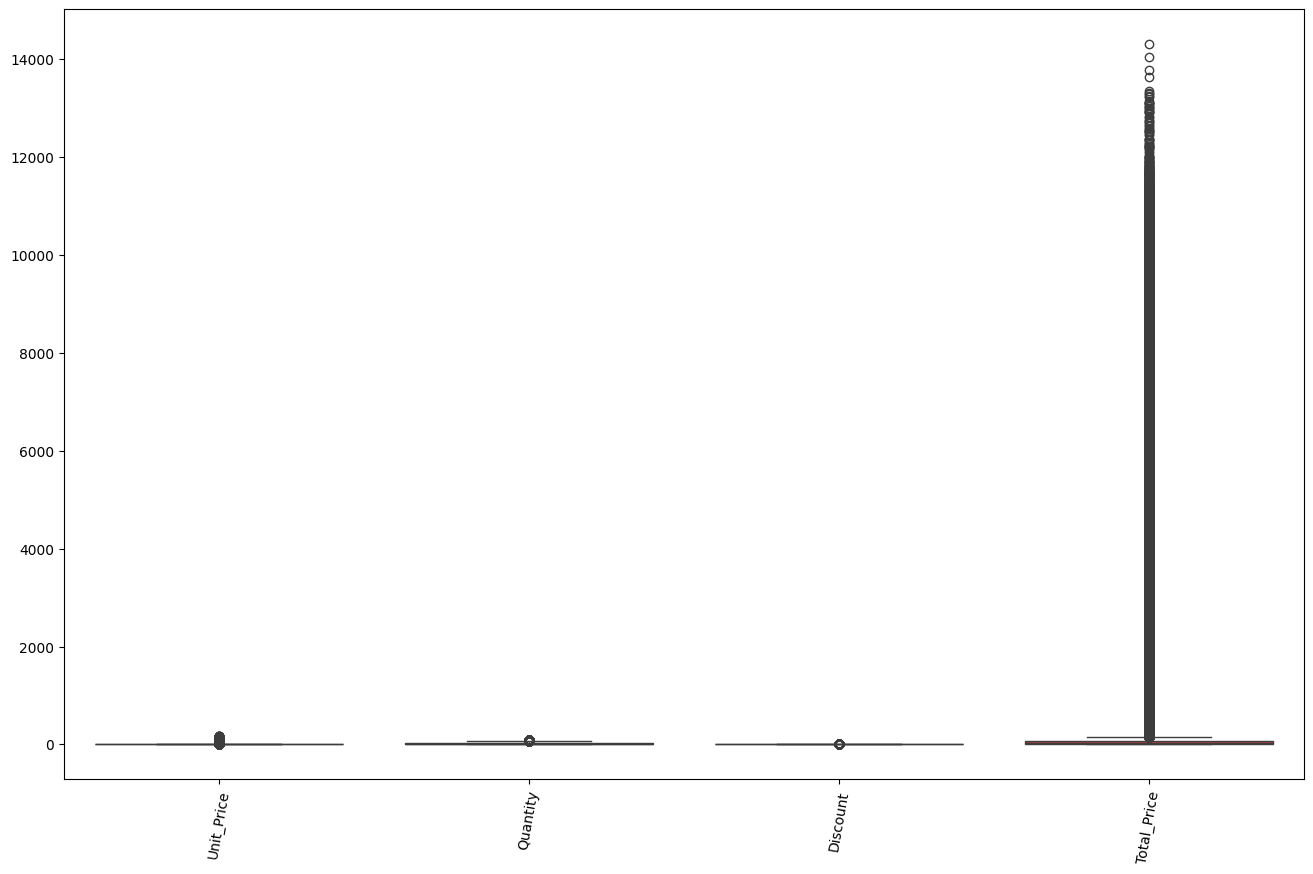

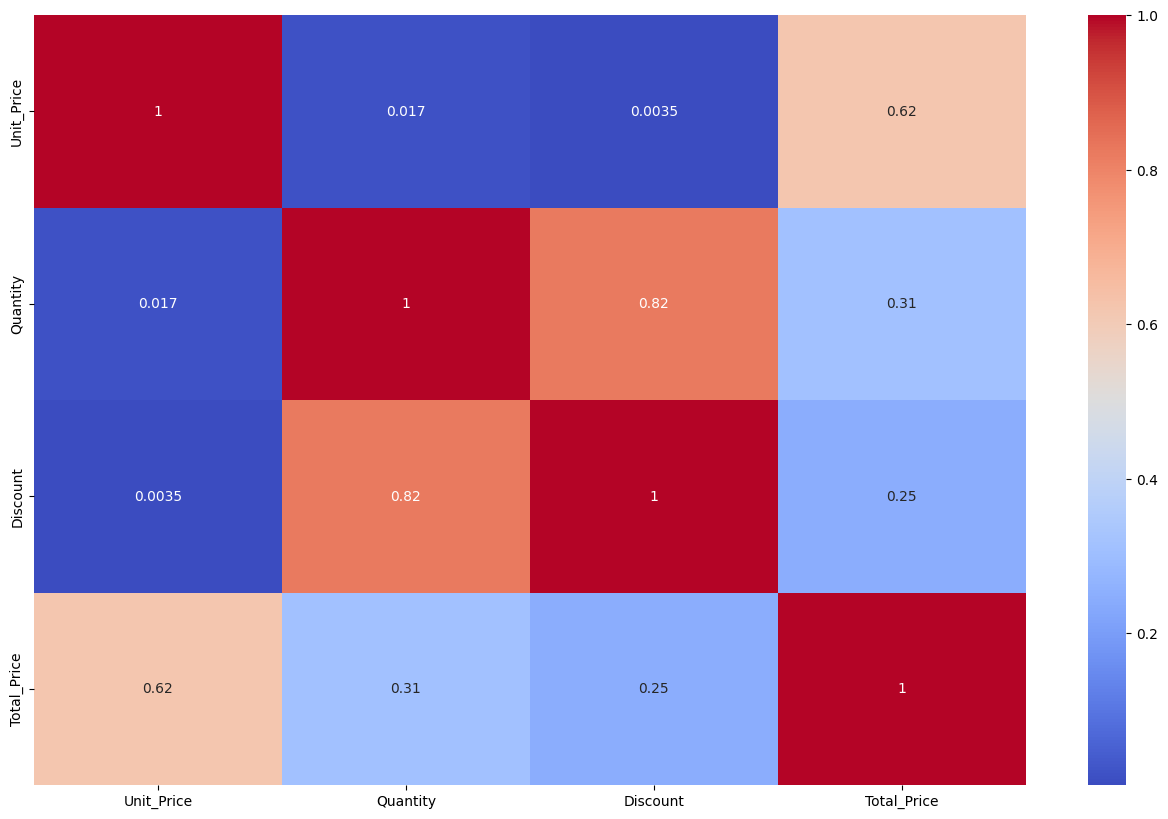

In [71]:
# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
df_copy.describe()

# Histogram untuk kolom numerik
df_copy.hist(figsize=(12, 12))
plt.show()

# Boxplot untuk kolom numerik
plt.figure(figsize=(16,10))
plt.xticks(rotation=80)
sns.boxplot(data=df_copy)
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(16, 10))
correlation_matrix = df_copy.select_dtypes(include = np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Hasil Analisis
Berdasarkan hasil heatmap corelation, saya hanya akan mengambil beberapa fitur yang memiliki keterkaitan, yaitu unit_price, quantity, discount,dan total_price. Saya juga akan mengambil 2 feature kategorikal untuk feature clustering yaitu category, dan region

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [72]:
# Karena data terlalu banyak maka dilakukan sampling data
df_copy = df.sample(n=10000, random_state=42)

In [73]:
# untuk keperluan data mentah akhir
df_final = df_copy.copy()

In [74]:
df_copy.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


In [75]:
df_copy.shape

(10000, 11)

In [76]:
df_copy.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [77]:
#2. Tidak ada data duplikat juga
df_copy.duplicated().sum()

np.int64(0)

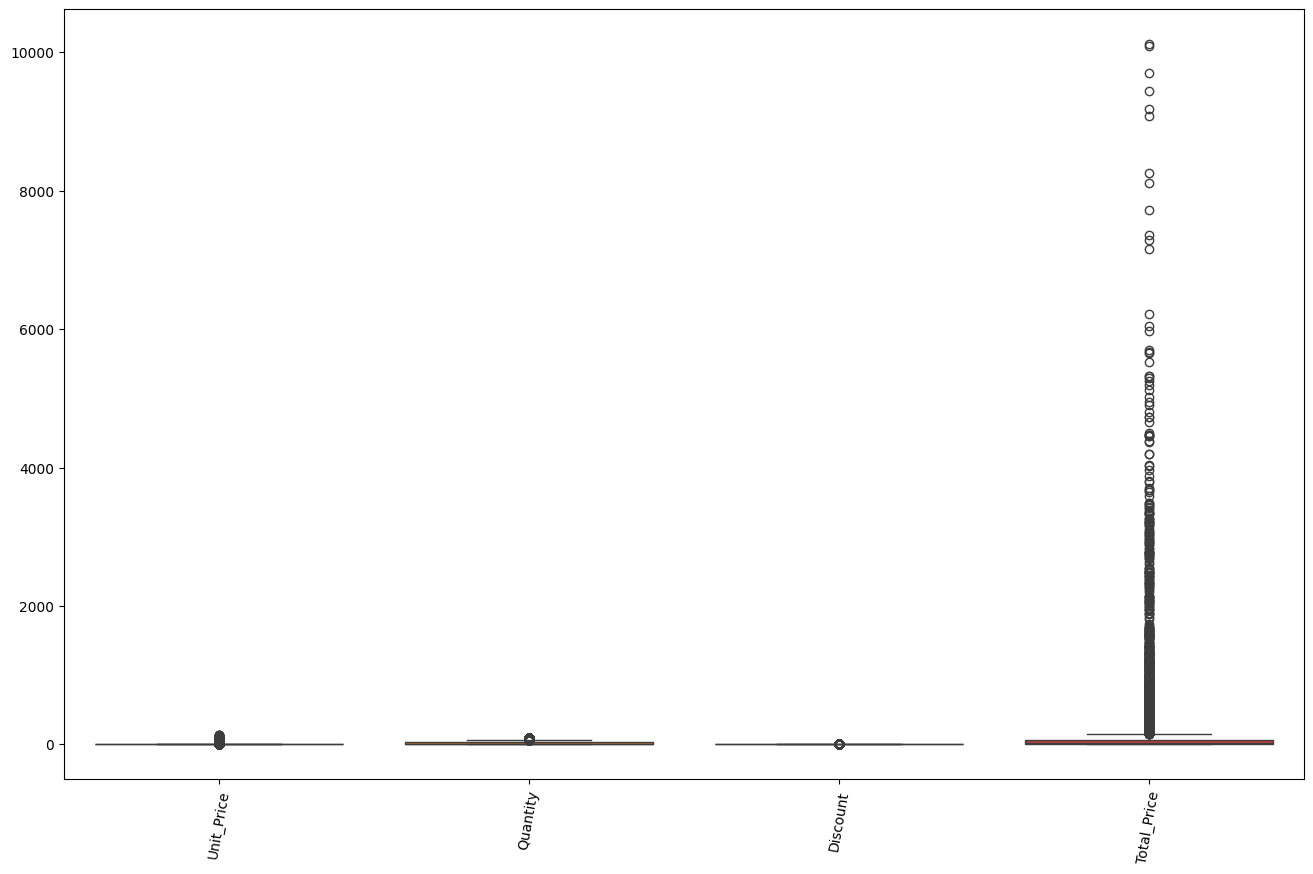

In [78]:
# Boxplot untuk kolom numerik
plt.figure(figsize=(16,10))
plt.xticks(rotation=80)
sns.boxplot(data=df_copy)
plt.show()

In [79]:
# Identifikasi kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

# Iterasi melalui setiap kolom numerik
for col in numerical_columns:
    # Hitung batas atas dan bawah menggunakan IQR
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas atas atau bawah
    df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
    df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])

# Cetak hasil
print("Data Asli:")
print(df)
print("\nData Setelah Capping:")
print(df_copy)

Data Asli:
           Order_ID Customer_ID Customer_Type              Product  \
0              ORD1     CUS1496           B2B           Vio Wasser   
1              ORD1     CUS1496           B2B                Evian   
2              ORD1     CUS1496           B2B               Sprite   
3              ORD1     CUS1496           B2B   Rauch Multivitamin   
4              ORD1     CUS1496           B2B         Gerolsteiner   
...             ...         ...           ...                  ...   
8999905  ORD2999999     CUS7080           B2C        Schwip Schwap   
8999906  ORD2999999     CUS7080           B2C       San Pellegrino   
8999907  ORD3000000     CUS6551           B2B             Red Bull   
8999908  ORD3000000     CUS6551           B2B  Passion Fruit Juice   
8999909  ORD3000000     CUS6551           B2B               Vittel   

            Category  Unit_Price  Quantity  Discount  Total_Price  \
0              Water        1.66        53      0.10        79.18   
1         

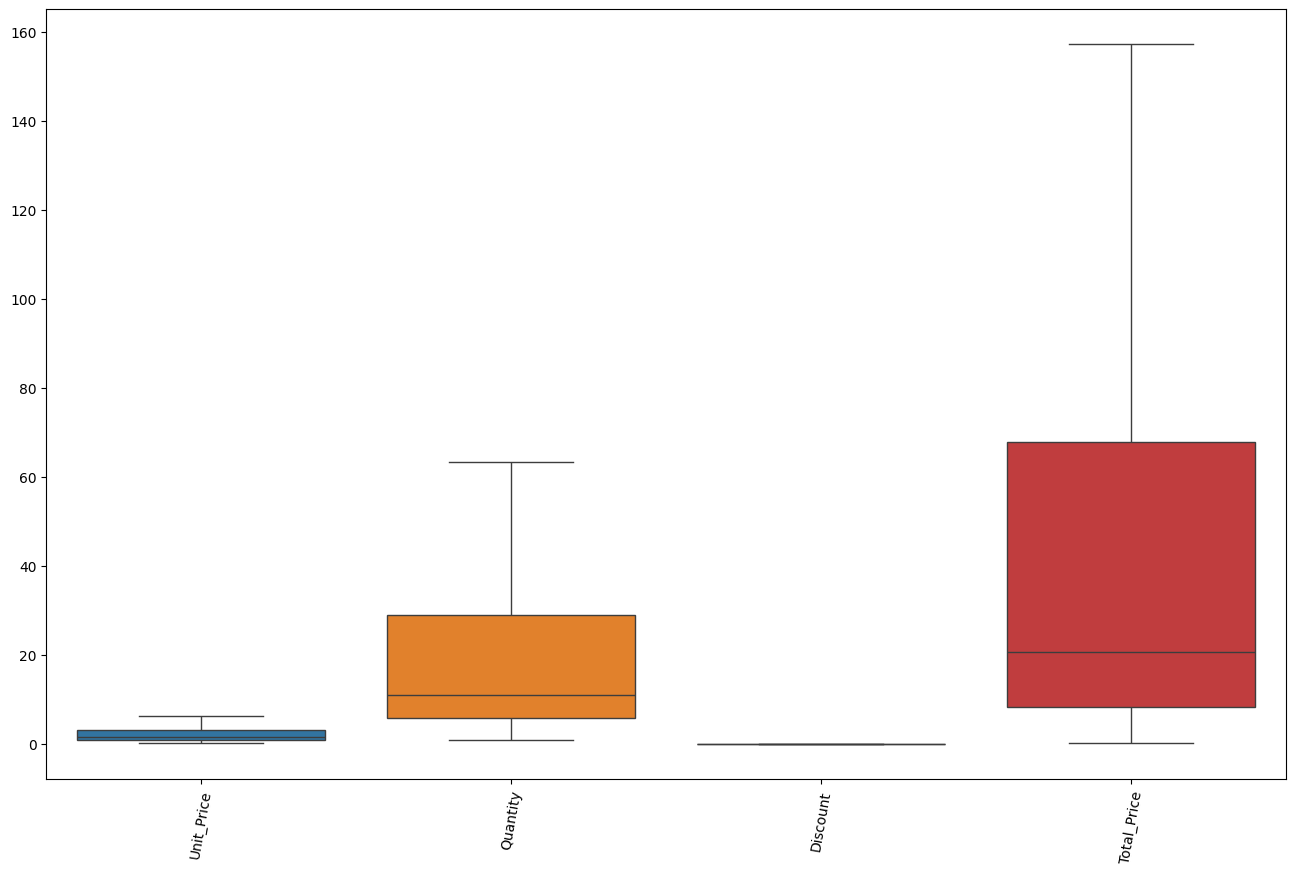

In [80]:
# Boxplot untuk kolom numerik
plt.figure(figsize=(16,10))
plt.xticks(rotation=80)
sns.boxplot(data=df_copy)
plt.show()

In [81]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membuat objek encoder
region_encoder = LabelEncoder()
category_encoder = LabelEncoder()

# fit dan transform data
df_copy['Region'] = region_encoder.fit_transform(df_copy['Region'])

# fit dan transform data
df_copy['Category'] = category_encoder.fit_transform(df_copy['Category'])
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaler.fit(df_copy[['Unit_Price', 'Quantity', 'Discount', 'Total_Price','Region', 'Category']])
df_copy[['Unit_Price', 'Quantity', 'Discount', 'Total_Price','Region', 'Category']] = scaler.transform(df_copy[['Unit_Price', 'Quantity', 'Discount', 'Total_Price','Region', 'Category']])
print(df_copy.head())

           Order_ID Customer_ID Customer_Type         Product  Category  \
4990465  ORD1663596     CUS5073           B2B  Hohes C Orange  0.333333   
5995542  ORD1999010      CUS141           B2B      Fritz-Kola  0.666667   
1044351   ORD347756      CUS562           B2B          Merlot  0.000000   
1802181   ORD600360     CUS7718           B2B  Moët & Chandon  0.000000   
6900691  ORD2300591     CUS6160           B2C   Granini Apple  0.333333   

         Unit_Price  Quantity  Discount  Total_Price    Region  Order_Date  
4990465    0.253707     1.000       0.8     0.791996  0.533333  2023-11-29  
5995542    0.253707     0.272       0.4     0.201714  0.266667  2021-05-13  
1044351    1.000000     1.000       1.0     1.000000  1.000000  2021-04-21  
1802181    1.000000     1.000       0.8     1.000000  0.333333  2021-08-23  
6900691    0.215815     0.048       0.0     0.039603  0.800000  2022-10-16  


In [82]:
selected_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price','Region', 'Category']
df_selected = df_copy[selected_features]

         Unit_Price  Quantity  Discount  Total_Price    Region  Category
4990465    0.253707     1.000       0.8     0.791996  0.533333  0.333333
5995542    0.253707     0.272       0.4     0.201714  0.266667  0.666667
1044351    1.000000     1.000       1.0     1.000000  1.000000  0.000000
1802181    1.000000     1.000       0.8     1.000000  0.333333  0.000000
6900691    0.215815     0.048       0.0     0.039603  0.800000  0.333333
...             ...       ...       ...          ...       ...       ...
1361788    1.000000     1.000       1.0     1.000000  0.866667  0.000000
846029     0.802306     0.880       0.8     1.000000  0.666667  0.000000
2915       0.283361     0.208       0.0     0.180796  0.133333  0.666667
6947958    0.490939     0.192       0.0     0.272183  0.266667  0.333333
267988     0.141680     0.064       0.0     0.035713  0.733333  0.666667

[10000 rows x 6 columns]


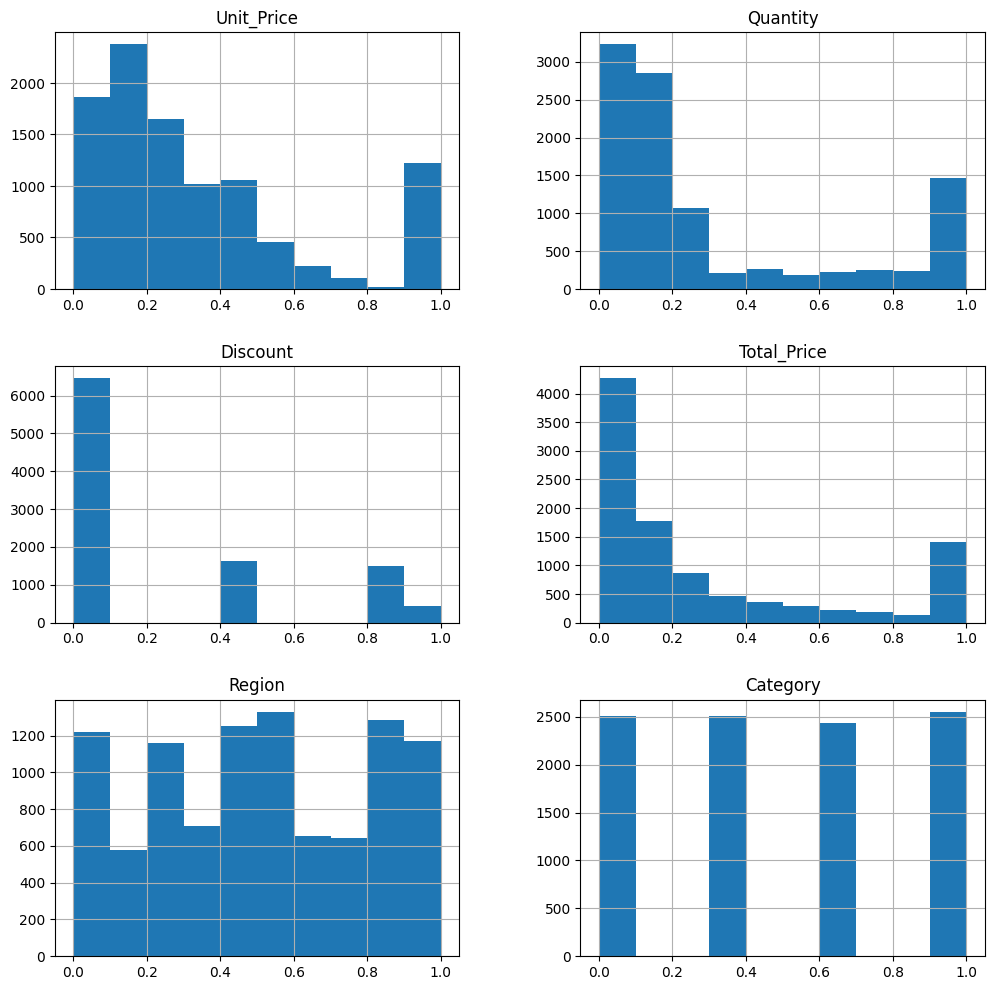

In [83]:
print(df_selected)
df_selected.hist(figsize=(12, 12))
plt.show()

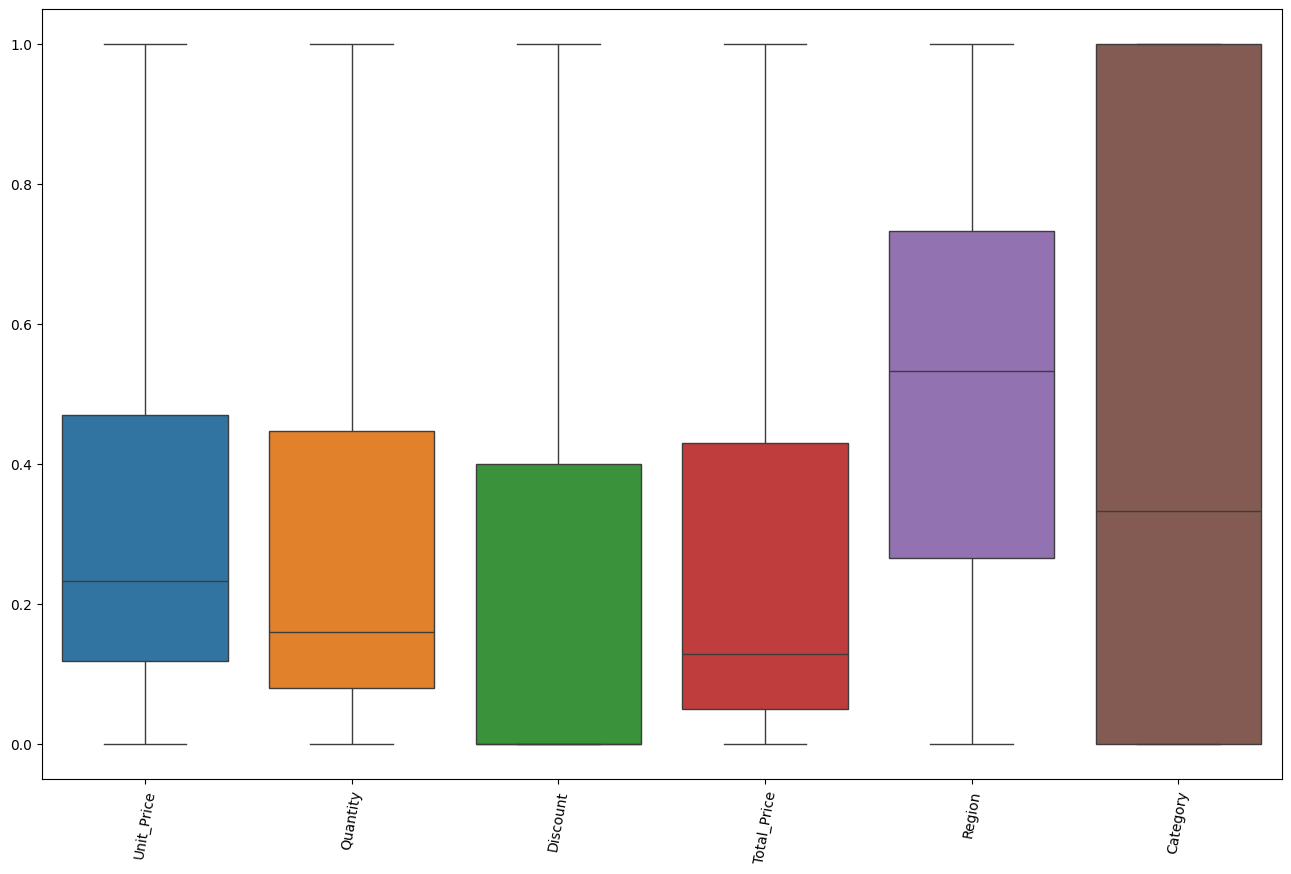

In [84]:
# Boxplot untuk kolom numerik
plt.figure(figsize=(16,10))
plt.xticks(rotation=80)
sns.boxplot(data=df_selected)
plt.show()

In [24]:
# 6. TIdak dilakukan binning

In [85]:
df_model = df_selected.copy()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

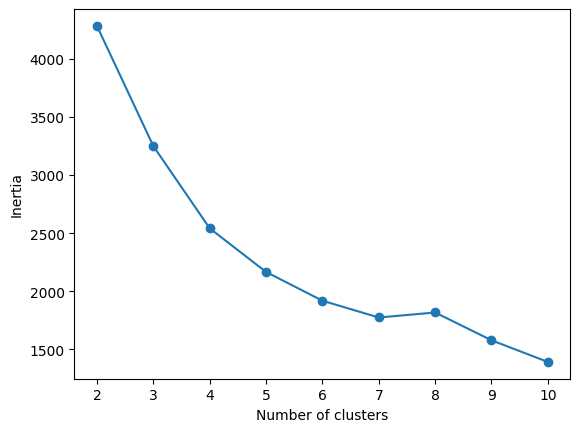

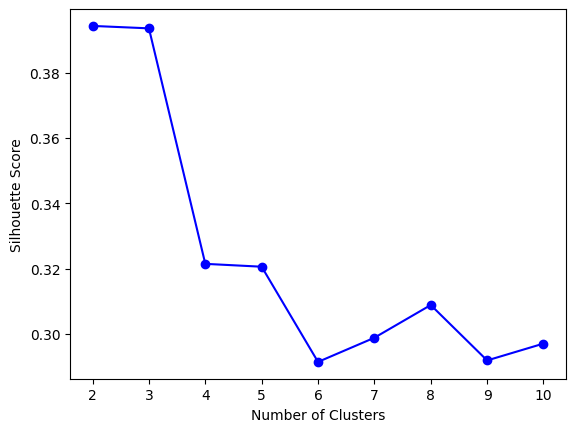

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

# Plot elbow curve (visualisasikan untuk memilih k optimal)
import matplotlib.pyplot as plt
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_model)
    score = silhouette_score(df_model, labels)
    scores.append(score)

plt.plot(range(2, 11), scores, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


## Hasil Analisis
Berdasarkan elbow method dan hasil silhoutte score yang didapatkan, saya akan menggunakan k=3

In [87]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans_model= KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df_model)

# Mendapatkan label cluster
labels = kmeans_model.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

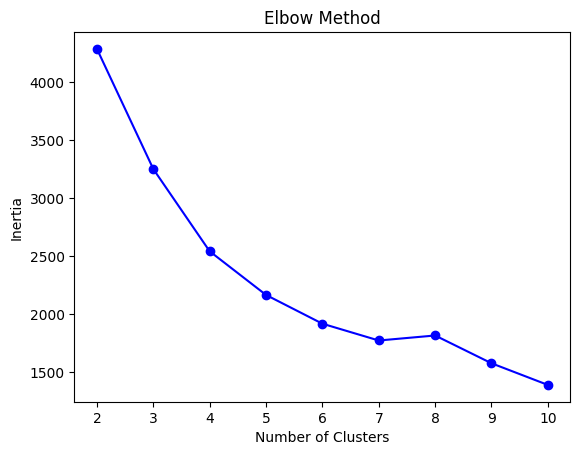

In [88]:
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

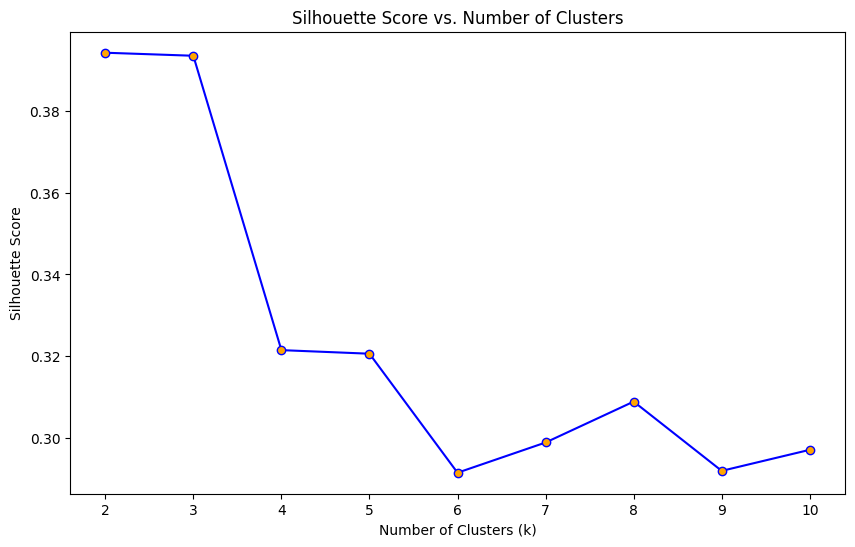

In [89]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_model)
    score = silhouette_score(df_model, labels)
    silhouette_scores.append(score)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, "bo-", markerfacecolor="orange")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

In [90]:
clusters = kmeans_model.fit_predict(df_model)
silhouette_new = silhouette_score(df_model, clusters)
print(f"Silhouette Score: {silhouette_new:.4f}")

Silhouette Score: 0.3935


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [91]:
# Seleksi 5 fitur terbaik menggunakan mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(df_model, clusters)

# Dapatkan indeks dan nama fitur terpilih
selected_features = selector.get_support(indices=True)
selected_feature_names = df_model.columns[selected_features]

print("Fitur terpilih:")
for idx, name in zip(selected_features, selected_feature_names):
    print(f"Indeks {idx}: {name}")

Fitur terpilih:
Indeks 0: Unit_Price
Indeks 1: Quantity
Indeks 2: Discount
Indeks 3: Total_Price
Indeks 5: Category


In [92]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

In [93]:
X_selected_df

,Unit_Price,Quantity,Discount,Total_Price,Category
0,0.253707,1.000,0.8,0.791996,0.333333
1,0.253707,0.272,0.4,0.201714,0.666667
2,1.000000,1.000,1.0,1.000000,0.000000
3,1.000000,1.000,0.8,1.000000,0.000000
4,0.215815,0.048,0.0,0.039603,0.333333
...,...,...,...,...,...
9995,1.000000,1.000,1.0,1.000000,0.000000
9996,0.802306,0.880,0.8,1.000000,0.000000
9997,0.283361,0.208,0.0,0.180796,0.666667
9998,0.490939,0.192,0.0,0.272183,0.333333


## Mengulang kembali clustering

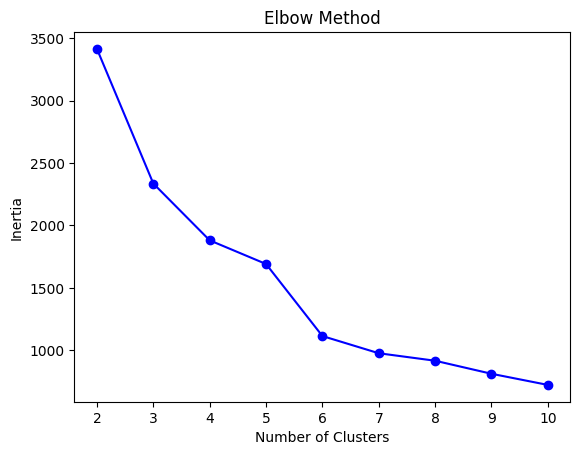

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

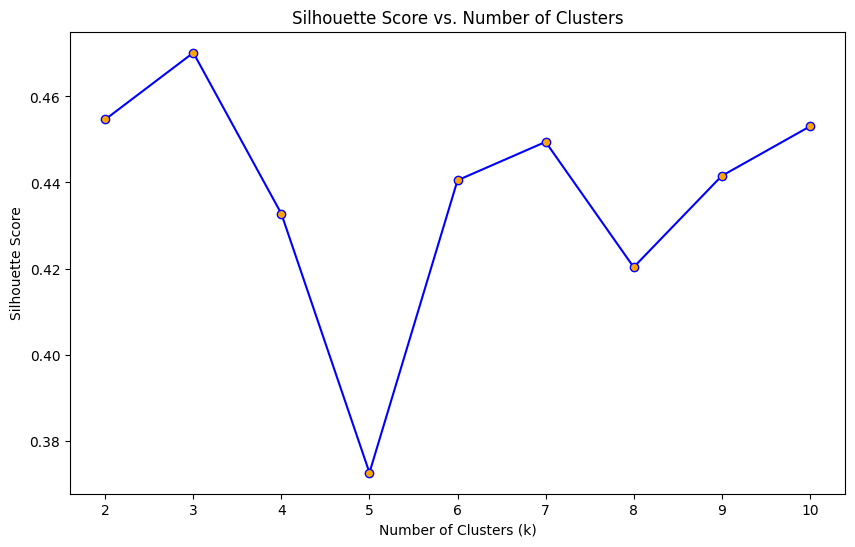

In [95]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_selected_df)
    score = silhouette_score(X_selected_df, labels)
    silhouette_scores.append(score)

# Plot hasil nya
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, "bo-", markerfacecolor="orange")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

Dari hasil elbow dan silhoutte, maka terpilih nilai k = 3

In [96]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans_newModel = KMeans(n_clusters=3, random_state=42)
kmeans_newModel.fit(X_selected_df)

# Mendapatkan label cluster
labels_new = kmeans_newModel.labels_

In [97]:
# Clustering dengan fitur terpilih
clustersnew = kmeans_newModel.fit_predict(X_selected_df)
silhouette_new = silhouette_score(X_selected_df, clustersnew)
print(f"Silhouette Score (New Features): {silhouette_new:.4f}")

Silhouette Score (New Features): 0.4702


## Hasil Analisis
Feature selection (Unit_Price,Quantity,Discount,Total_Price, Category) terbukti dapat meningkatkan nilai silhoutte score dari 0.38 sekian menjadi 0.4706

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


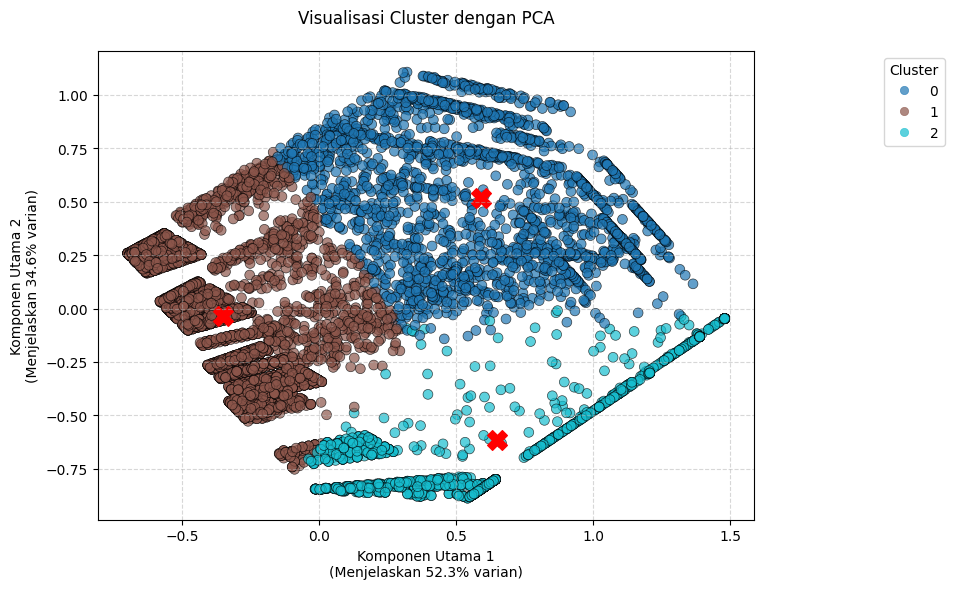

In [98]:
# Reduksi dimensi ke 2 komponen PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_df)  # X_selected = hasil seleksi fitur

# Visualisasi dengan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clustersnew,
    cmap='tab10',
    s=50,
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5
)

# Tambahkan centroid cluster
centroids = kmeans_newModel.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroid'
)

# Keterangan warna untuk setiap cluster
plt.legend(*scatter.legend_elements(),
           title="Cluster",
           loc="upper right",
           bbox_to_anchor=(1.3, 1))

# Label dan judul
plt.title("Visualisasi Cluster dengan PCA", fontsize=12, pad=20)
plt.xlabel("Komponen Utama 1\n(Menjelaskan {}% varian)".format(
    round(pca.explained_variance_ratio_[0]*100, 1)))
plt.ylabel("Komponen Utama 2\n(Menjelaskan {}% varian)".format(
    round(pca.explained_variance_ratio_[1]*100, 1)))
plt.grid(True, linestyle='--', alpha=0.5)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster
Berikut adalah analisis mendalam untuk setiap cluster yang dihasilkan dari model K-Means:

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [99]:
df_copy.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,0.333333,0.253707,1.000,0.8,0.791996,0.533333,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,0.666667,0.253707,0.272,0.4,0.201714,0.266667,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,0.000000,1.000000,1.000,1.0,1.000000,1.000000,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,0.000000,1.000000,1.000,0.8,1.000000,0.333333,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,0.333333,0.215815,0.048,0.0,0.039603,0.800000,2022-10-16


In [100]:
df_copy[['Unit_Price', 'Quantity', 'Discount', 'Total_Price','Region', 'Category']] = scaler.inverse_transform(df_copy[['Unit_Price', 'Quantity', 'Discount', 'Total_Price','Region', 'Category']])

In [101]:
# fit dan transform data
df_copy['Region'] = region_encoder.inverse_transform(df_copy[['Region']].astype(int))

# fit dan transform data
df_copy['Category'] = category_encoder.inverse_transform(df_copy[['Category']].astype(int))


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
# df_final adalah copy dari df copy yang belum diprepprocessing sehingga data masih mentah
df_final.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


In [103]:
#mengembalikan nilai mentah yang sebelum di capping karena capping bersifat destruktif
df_copy['Unit_Price'] = df_final['Unit_Price']
df_copy['Quantity'] = df_final['Quantity']
df_copy['Discount'] = df_final['Discount']
df_copy['Total_Price'] = df_final['Total_Price']

In [104]:
df_copy.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


In [105]:
# langsung isi value karena labels sudah diassign dengan k.means.labels
df_copy['Cluster'] = labels_new
df_copy.head()
# Data cluster sudah masuk dan data feature lain adalah data original seperti di awal

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29,0
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13,1
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21,2
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23,2
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [106]:
# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_Unit_Price = cluster_data['Unit_Price'].mean()
        mean_Quantity = cluster_data['Quantity'].mean()
        mean_Discount = cluster_data['Discount'].mean()
        mean_Total_Price = cluster_data['Total_Price'].mean()
        mostFrequent_Region = cluster_data['Region'].mode()[0]
        mostFrequent_Category = cluster_data['Category'].mode()[0]

        # Menampilkan hasil

        print(f"\nCluster {cluster_id}:")
        print(f"Rata-rata Unit_Price: {mean_Unit_Price:.2f}")
        print(f"Rata-rata Quantity: {mean_Quantity:.2f}")
        print(f"Rata-rata Discount: {mean_Discount:.2f}")
        print(f"Rata-rata Total_Price: {mean_Total_Price:.2f}")
        print(f"Daerah Terbanyak: {mostFrequent_Region}")
        print(f"Kategori Terbanyak: {mostFrequent_Category}")

# Analisis karakteristik setiap cluster
analyze_clusters(df_copy, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 0:
Rata-rata Unit_Price: 1.06
Rata-rata Quantity: 26.74
Rata-rata Discount: 0.07
Rata-rata Total_Price: 25.34
Daerah Terbanyak: Hessen
Kategori Terbanyak: Water

Cluster 1:
Rata-rata Unit_Price: 1.59
Rata-rata Quantity: 7.74
Rata-rata Discount: 0.00
Rata-rata Total_Price: 12.33
Daerah Terbanyak: Rheinland-Pfalz
Kategori Terbanyak: Soft Drinks

Cluster 2:
Rata-rata Unit_Price: 42.72
Rata-rata Quantity: 12.99
Rata-rata Discount: 0.01
Rata-rata Total_Price: 465.43
Daerah Terbanyak: Hamburg
Kategori Terbanyak: Alcoholic Beverages


## Cluster 0: Produk Ekonomis dengan Volume Pembelian Tinggi
  - Rata-rata Unit_Price: €1.06 (sangat rendah)
  - Rata-rata Quantity: 26.74 unit (tinggi)
  - Rata-rata Discount: 0.07 (cukup tinggi)
  - Rata-rata Total_Price: €25.34 (rendah)
  - Daerah Terbanyak: Hessen
  - Kategori Terbanyak: Water

  - Interpretasi:
  Cluster ini mencerminkan produk dengan harga sangat terjangkau, namun dibeli dalam jumlah besar dan mendapatkan diskon moderat. Dominasi kategori Water dan distribusi utama di Hessen menunjukkan bahwa produk ini sering dikonsumsi untuk kebutuhan harian atau operasional dalam skala besar.

  - Rekomendasi:
    - Tawarkan program loyalitas untuk pelanggan rutin dengan volume pembelian tinggi.
    - Fokus pada efisiensi logistik agar tetap menguntungkan meski margin kecil.
    - Tingkatkan promosi di wilayah Hessen untuk memperluas basis pelanggan dengan pola pembelian serupa.

## Cluster 1: Produk Harga Menengah dengan Volume Rendah
  - Rata-rata Unit_Price: €1.59 (rendah-menengah)
  - Rata-rata Quantity: 7.74 unit (rendah)
  - Rata-rata Discount: 0.00 (tidak ada)
  - Rata-rata Total_Price: €12.33 (rendah)
  - Daerah Terbanyak: Rheinland-Pfalz
  - Kategori Terbanyak: Soft Drinks

  - Interpretasi:
  Produk dalam cluster ini memiliki harga terjangkau namun dibeli dalam jumlah kecil dan hampir tidak pernah mendapatkan diskon. Dominasi Soft Drinks menunjukkan konsumsi kasual yang tidak rutin dan kemungkinan berasal dari pembeli individu atau ritel kecil.

  - Rekomendasi:
    - Terapkan promosi ringan seperti Buy 2 Get 1 Free untuk mendorong peningkatan jumlah pembelian.
    - Fokus pada pemasaran di Rheinland-Pfalz dengan kampanye yang menonjolkan kesegaran dan kenyamanan.
    - Lakukan uji coba bundling produk dengan item populer lainnya untuk meningkatkan total transaksi.

## Cluster 2: Produk Premium dengan Harga Tinggi dan Volume Sedang
  - Rata-rata Unit_Price: €42.72 (sangat tinggi)
  - Rata-rata Quantity: 12.99 unit (sedang)
  - Rata-rata Discount: 0.01 (sangat rendah)
  - Rata-rata Total_Price: €465.43 (sangat tinggi)
  - Daerah Terbanyak: Hamburg
  - Kategori Terbanyak: Alcoholic Beverages

  - Interpretasi:
  Cluster ini jelas menggambarkan produk-produk premium dengan harga satuan sangat tinggi, pembelian dalam jumlah sedang, dan diskon minimal. Dominasi kategori Alcoholic Beverages dan konsentrasi di Hamburg menandakan produk yang dibeli oleh pelanggan kelas atas atau untuk kebutuhan khusus seperti event atau bisnis hospitality.

  - Rekomendasi:
    - Bangun narasi brand eksklusif melalui storytelling tentang kualitas, proses, atau asal produk.
    - Tawarkan layanan spesial seperti paket hadiah, private tasting, atau pengiriman eksklusif di area Hamburg.
    - Jalin kerja sama dengan hotel, restoran, atau event organizer untuk memperluas jangkauan pasar premium.

## Kesimpulan Umum
  - Cluster 0 mencerminkan produk berharga sangat rendah dengan volume pembelian tinggi dan diskon moderat. Didominasi oleh air mineral di wilayah Hessen, cocok untuk strategi efisiensi distribusi dan program loyalitas pelanggan besar.
  - Cluster 1 menunjukkan produk dengan harga terjangkau namun pembelian rendah dan tanpa diskon. Fokus utama ada pada Soft Drinks di wilayah Rheinland-Pfalz, cocok untuk strategi peningkatan volume melalui promosi ringan.
  - Cluster 2 menonjol sebagai produk premium dengan harga tinggi dan volume pembelian sedang. Ditemukan terutama di Hamburg dan mencakup Alcoholic Beverages, cocok untuk strategi pemasaran eksklusif dan branding premium.

## Prioritas Intervensi
  - Cluster 0 (Volume Tinggi - Air Mineral): Fokus pada efisiensi distribusi dan retensi pelanggan besar.
  - Cluster 1 (Volume Rendah - Soft Drinks): Dorong pembelian lebih besar melalui bundling dan promosi ringan.
  - Cluster 2 (Produk Premium - Minuman Beralkohol): Perkuat branding premium dan jalin kemitraan strategis di sektor B2B.

## Program Strategis
  - Edukasi Pelanggan: Bangun narasi kualitas dan eksklusivitas untuk produk di Cluster 2 melalui media sosial dan katalog digital.
  - Promosi Tersegmentasi:
    - Cluster 0: Promo musiman dan program loyalitas berbasis volume pembelian.
    - Cluster 1: Diskon ringan dan bundling kreatif untuk menarik minat pembelian lebih besar.
    - Cluster 2: Hadiah eksklusif dan kerja sama brand untuk membangun citra mewah.
  - Optimalisasi Stok dan Distribusi:
    - Distribusi cepat dan rotasi tinggi untuk Cluster 0.
    - Persediaan fleksibel dan lokal di wilayah kunci seperti Rheinland-Pfalz untuk Cluster 1.
    - Penataan inventaris eksklusif dengan sistem pre-order di Cluster 2.

<!-- Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

```
# This is formatted as code
```

 -->

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [109]:
df_copy.to_csv('beverage_sales_cluster.csv', index=False)